<a href="https://colab.research.google.com/github/Tamara-Nahapetyan/HW2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

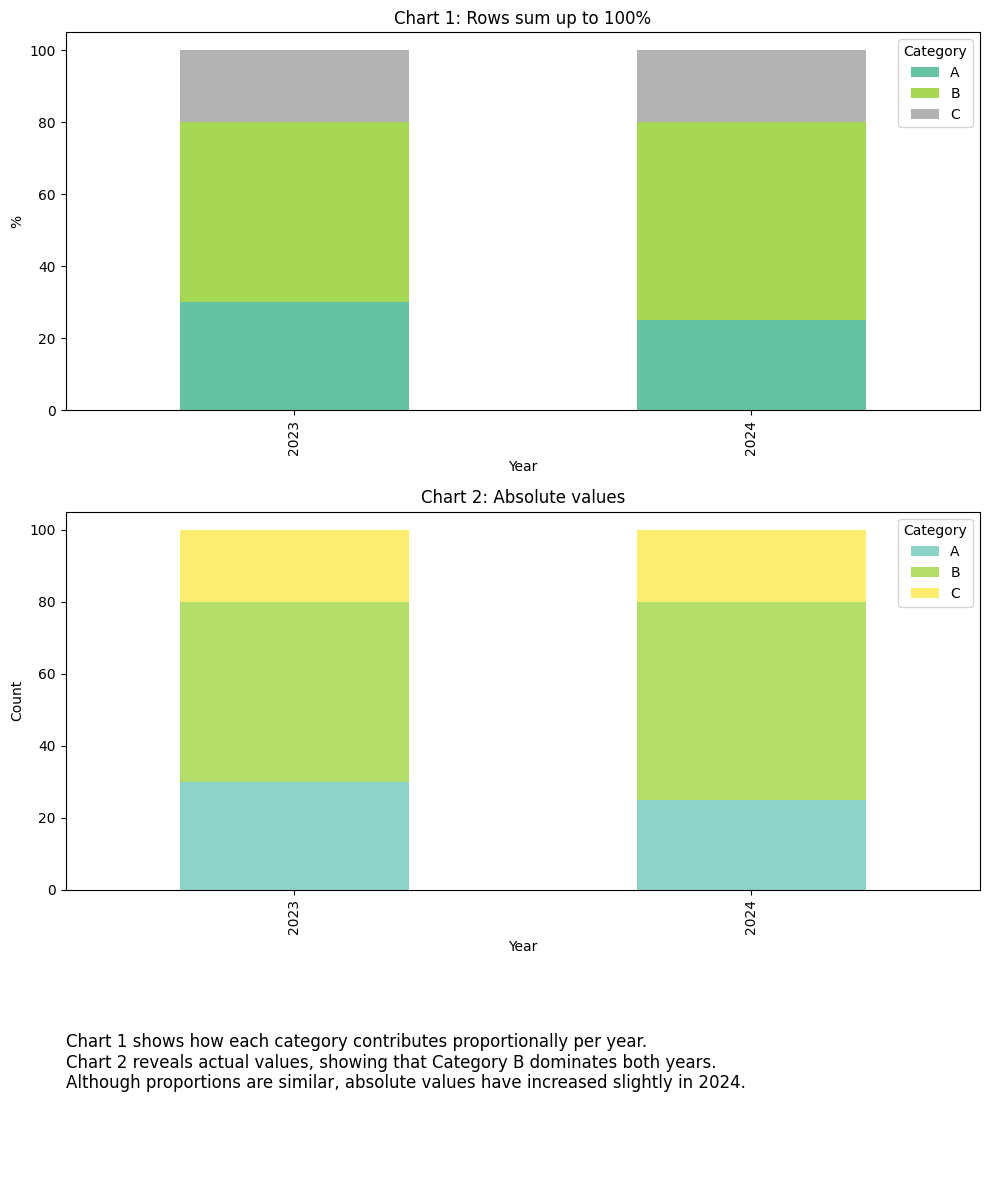

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    '2023': [30, 50, 20],
    '2024': [25, 55, 20]
})

# Transposing and preparing for plotting
data_melt = data.set_index('Category').T.reset_index().rename(columns={'index': 'Year'})
data_norm = data_melt.copy()

# Normalizing rows to sum to 100%
row_sums = data_norm[['A', 'B', 'C']].sum(axis=1)
data_norm[['A', 'B', 'C']] = data_norm[['A', 'B', 'C']].div(row_sums, axis=0) * 100

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [1, 1, 0.5]})

# Chart 1: Normalized to 100%
data_norm.set_index('Year')[['A', 'B', 'C']].plot(kind='bar', stacked=True, ax=axs[0], colormap='Set2')
axs[0].set_title("Chart 1: Rows sum up to 100%")
axs[0].set_ylabel("%")

# Chart 2: Absolute values
data_melt.set_index('Year')[['A', 'B', 'C']].plot(kind='bar', stacked=True, ax=axs[1], colormap='Set3')
axs[1].set_title("Chart 2: Absolute values")
axs[1].set_ylabel("Count")

# Chart 3: Description
description = (
    "Chart 1 shows how each category contributes proportionally per year.\n"
    "Chart 2 reveals actual values, showing that Category B dominates both years.\n"
    "Although proportions are similar, absolute values have increased slightly in 2024."
)
axs[2].axis("off")
axs[2].text(0, 0.5, description, fontsize=12, wrap=True)

plt.tight_layout()
plt.show()